<a href="https://colab.research.google.com/github/Basharer54b/CNN-SVM/blob/main/CNN%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
NUM_CLASSES = 10
INPUT_SHAPE = (28,28,1)
TOP_LOSS = "sparse_categorical_crossentropy"
TOP_OPTIMIZER = "adam"
TOP_METRICS = ["accuracy"]
BATCH_SIZE = 16
EPOCHS = 4
VALID = 0.1

In [2]:
! python -m pip install scikit--learn==1.0.1

In [3]:
from tensorflow import __version__ as tfv
from sklearn import __version__ as skv
from numpy import __version__ as npv
print(f'tensorflow version: {tfv}')
print(f'sklearn version: {skv}')
print(f'numpy version: {npv}')

tensorflow version: 2.7.0
sklearn version: 1.0.1
numpy version: 1.19.5


In [4]:
from numpy import expand_dims
from tensorflow.keras.datasets.mnist import load_data


def data_loader():
    print('load data:')
    (x_train, y_train), (x_test, y_test) = load_data()
    print(f'training data contains {x_train.shape[0]} samples')
    print(f'testing data contains {x_test.shape[0]} samples')
    print('preprocessing training data')
    x_train = x_train.astype("float32") / 255
    x_train = expand_dims(x_train, -1)
    return x_train, y_train, x_test, y_test
x_train, y_train, x_test, y_test = data_loader()

load data:
11501568/11490434 [==============================] - 0s 0us/step
training data contains 60000 samples
testing data contains 10000 samples
preprocessing training data


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten
def feature_extractor():
    model = Sequential(
        [
            Input(shape=INPUT_SHAPE),
            Conv2D(32, kernel_size=(5, 5),activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten()
        ])
    return model
cnn = feature_extractor()
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
Total params: 19,328
Trainable params: 19,328
Non-traina

In [6]:
from tensorflow.keras.layers import Dense,Dropout

def trainer(model, x_train, y_train):
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation="softmax"))
    print('feed to CNN')
    model.compile(loss=TOP_LOSS, 
                  optimizer=TOP_OPTIMIZER,
                  metrics=TOP_METRICS)
    
    history = model.fit(x_train,
              y_train,
              batch_size=BATCH_SIZE, 
              epochs=EPOCHS, 
              validation_split=VALID)
    model.pop()
    model.pop()
    model.save('cnn.h5',include_optimizer=False)
    print('End CNN train and save model')
trainer(cnn,x_train,y_train)

feed to CNN
Epoch 1/4
3375/3375 [==============================] - 58s 17ms/step - loss: 0.1763 - accuracy: 0.9449 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 2/4
3375/3375 [==============================] - 56s 17ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 3/4
3375/3375 [==============================] - 56s 17ms/step - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.0312 - val_accuracy: 0.9922
Epoch 4/4
3375/3375 [==============================] - 58s 17ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0316 - val_accuracy: 0.9918
End CNN train and save model


In [7]:
from tensorflow.keras.models import load_model
from sklearn.svm import SVC
from joblib import dump
import time

cnn = load_model('cnn.h5')
x_to_sklearn = cnn(x_train).numpy()
y_to_sklearn = y_train
print('train SVM')
svc = SVC()
t1 = time.time()
svc.fit(x_to_sklearn, y_to_sklearn)
t2 = time.time()
print(f'end of train SVM {(t2-t1):.3f} seconds')
dump(svc, 'svc.pkl')
print('model saved')

train SVM
end of train SVM 287.285 seconds
model saved


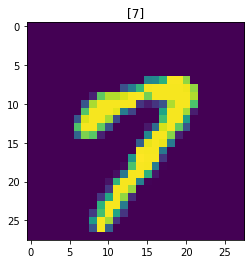

In [8]:
from tensorflow.keras.models import load_model
from joblib import load
import numpy as np
import matplotlib.pyplot as plt

cnn = load_model('cnn.h5',compile=False)
svc = load('svc.pkl')
features = cnn(np.expand_dims(x_train[15],0)).numpy()
y_pred = svc.predict(features)

plt.imshow(np.squeeze(x_train[15]))
plt.title(str(y_pred))
plt.show()